Exploring the HR Employee Attrition Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import qdesc as qd

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
pd.set_option('display.max_columns', None)
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [4]:
# Generating a frequency distribution for all the categorical features from the said data frame.
qd.freqdist(df, 'Attrition')

,Attrition,Count,Percentage
0,No,1233,83.877551
1,Yes,237,16.122449


In [8]:
# Generate descriptive analysis for Monthly rate when grouped by Attrition.
qd.grp_desc(df, 'MonthlyRate', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,14265.78,7102.26,14120.0,6215.0,2094,26997,14.91,0.78
1,Yes,237,14559.31,7208.15,14618.0,6299.0,2326,26999,2.71,0.77


In [9]:
# Generate descriptive analysis for Performance Rating when grouped by Attrition.
qd.grp_desc(df, 'PerformanceRating', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,3.15,0.36,3.0,0.0,3,4,363.18,0.78
1,Yes,237,3.16,0.36,3.0,0.0,3,4,69.29,0.77


In [10]:
# Generate descriptive analysis for Relationship Satisfaction when grouped by Attrition.
qd.grp_desc(df, 'RelationshipSatisfaction', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,2.73,1.07,3.0,1.0,1,4,64.45,0.78
1,Yes,237,2.60,1.13,3.0,1.0,1,4,12.68,0.77


In [11]:
# Generate descriptive analysis for Total Working Years when grouped by Attrition.
qd.grp_desc(df, 'TotalWorkingYears', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,11.86,7.76,10.0,4.0,0,38,37.39,0.78
1,Yes,237,8.24,7.17,7.0,3.0,0,40,8.50,0.77


In [12]:
# Generate descriptive analysis for Work life balance when grouped by Attrition.
qd.grp_desc(df, 'WorkLifeBalance', 'Attrition')

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,2.78,0.68,3.0,0.0,1,4,130.49,0.78
1,Yes,237,2.66,0.82,3.0,0.0,1,4,18.35,0.77


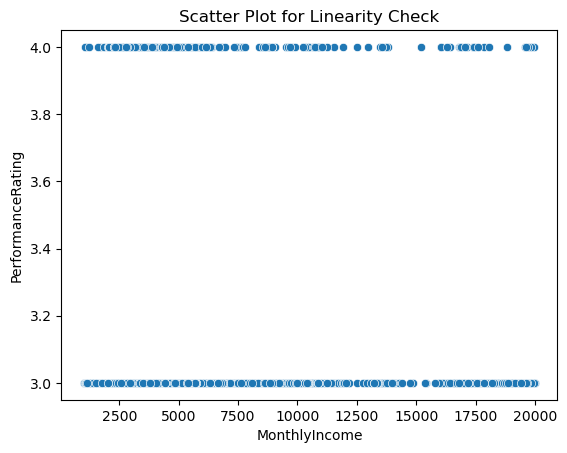

In [13]:
# Checking the linearity assumption of the variables using a scatter plot.
sns.scatterplot(x=df['MonthlyIncome'], y=df['PerformanceRating'])
plt.title('Scatter Plot for Linearity Check')
plt.show()


--- Variable: Age ---
  Anderson-Darling Statistic : 9.9686
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


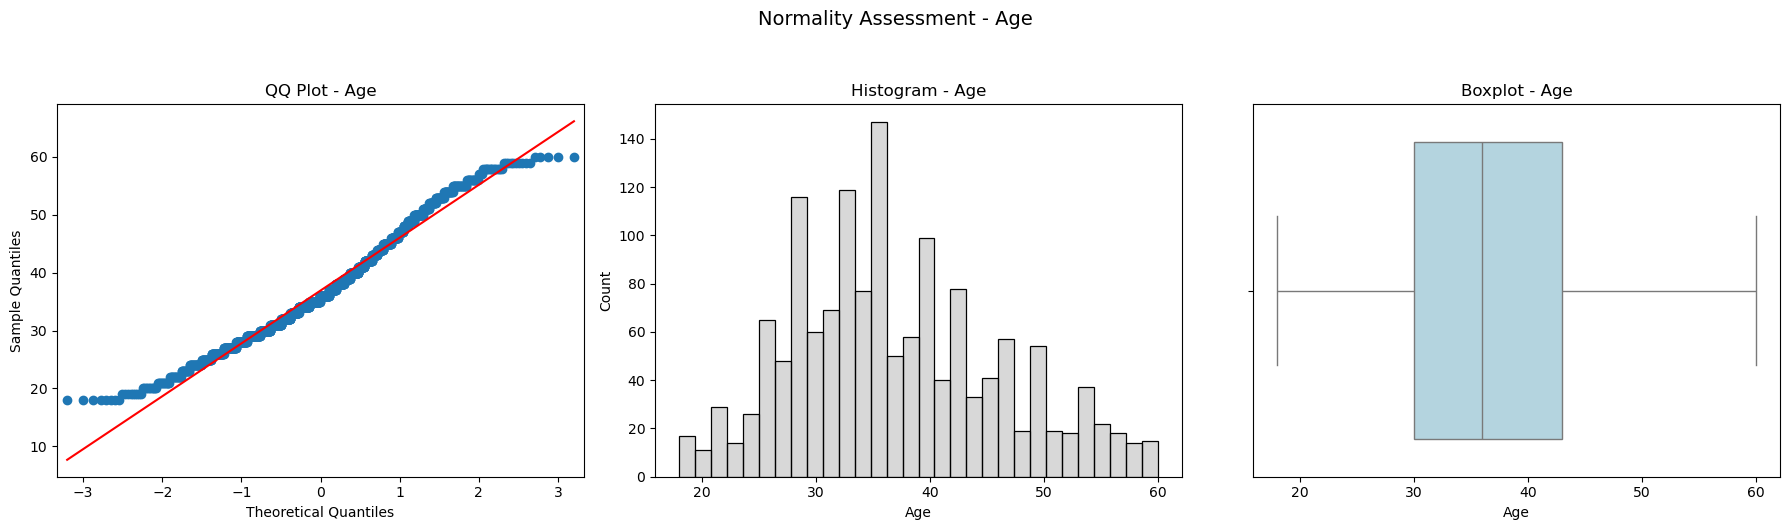


--- Variable: DailyRate ---
  Anderson-Darling Statistic : 16.8293
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


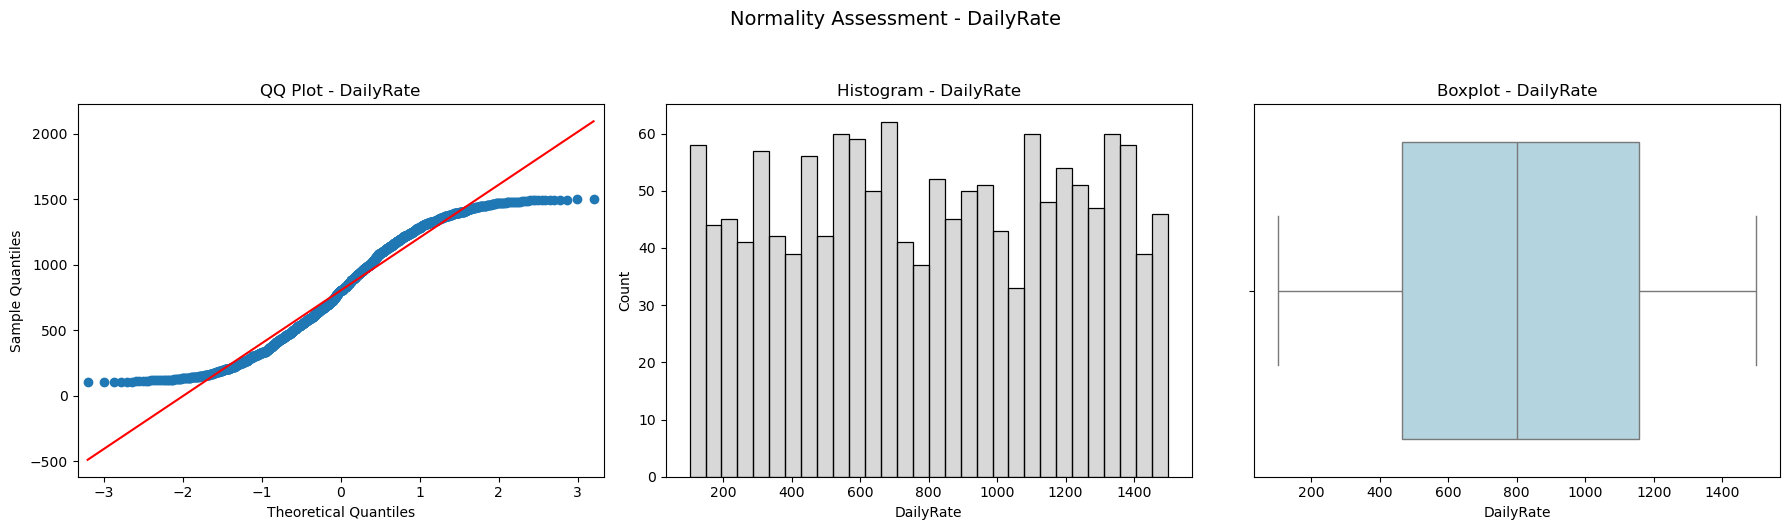


--- Variable: DistanceFromHome ---
  Anderson-Darling Statistic : 68.3103
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


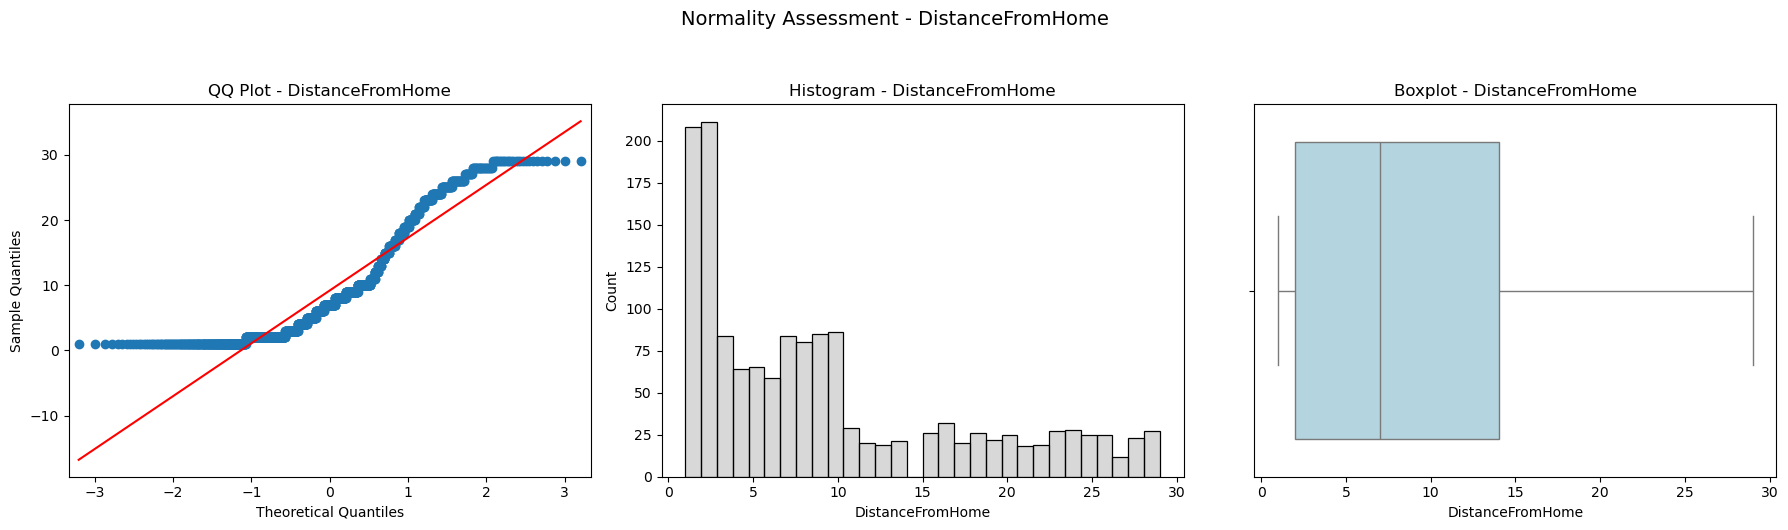


--- Variable: Education ---
  Anderson-Darling Statistic : 66.0537
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


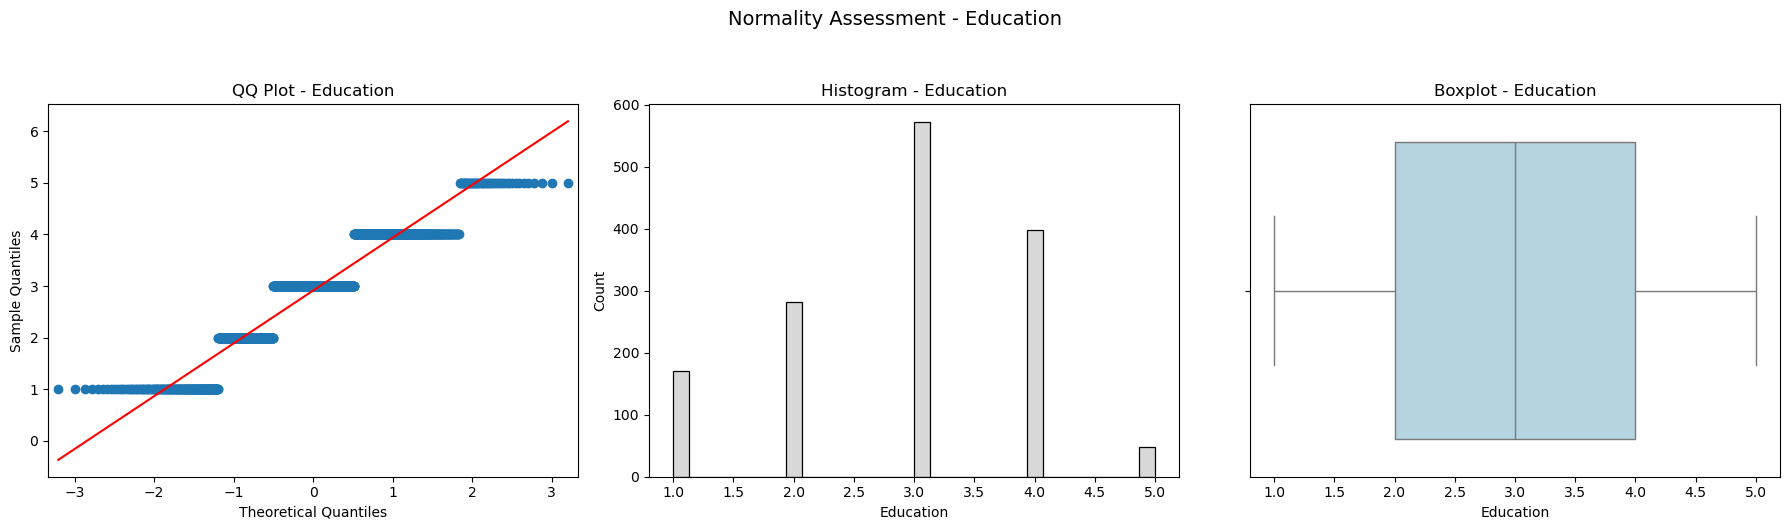


--- Variable: EmployeeCount ---
  Anderson-Darling Statistic : nan
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


C:\Users\Lovelyn Tampus\anaconda3\envs\training\Lib\site-packages\scipy\stats\_morestats.py:2215: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s


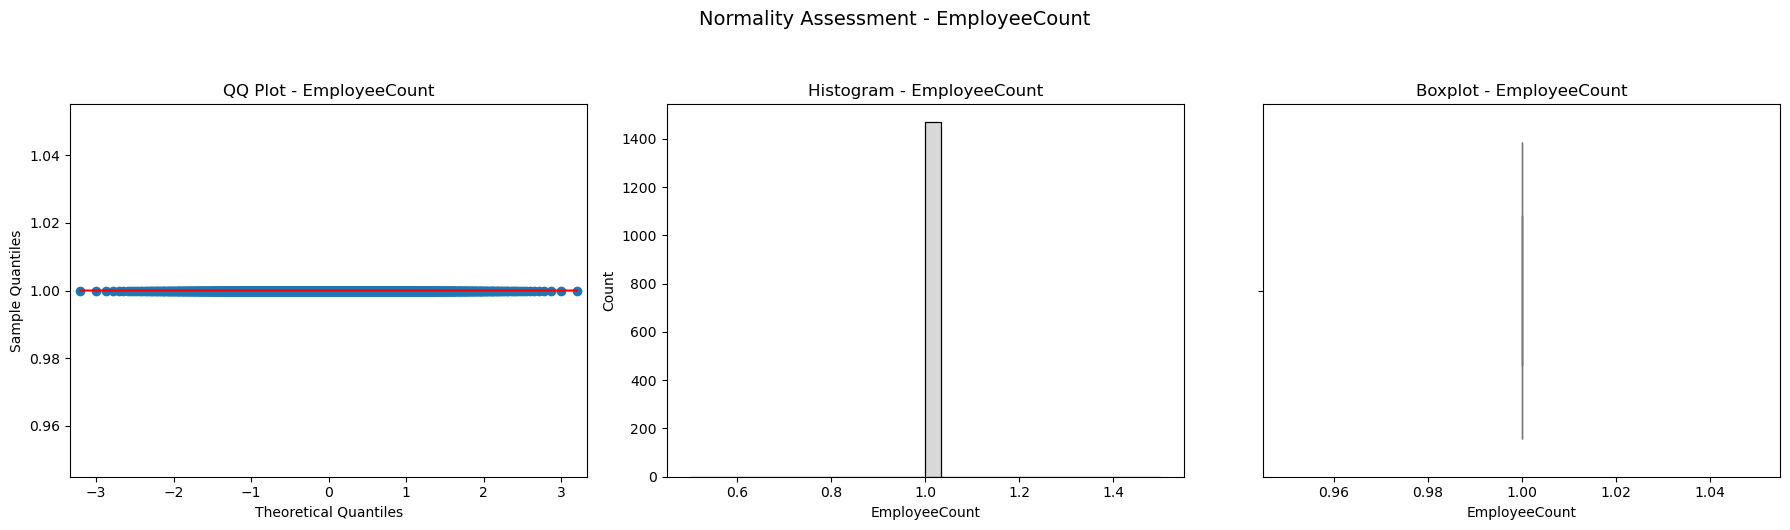


--- Variable: EmployeeNumber ---
  Anderson-Darling Statistic : 17.7601
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


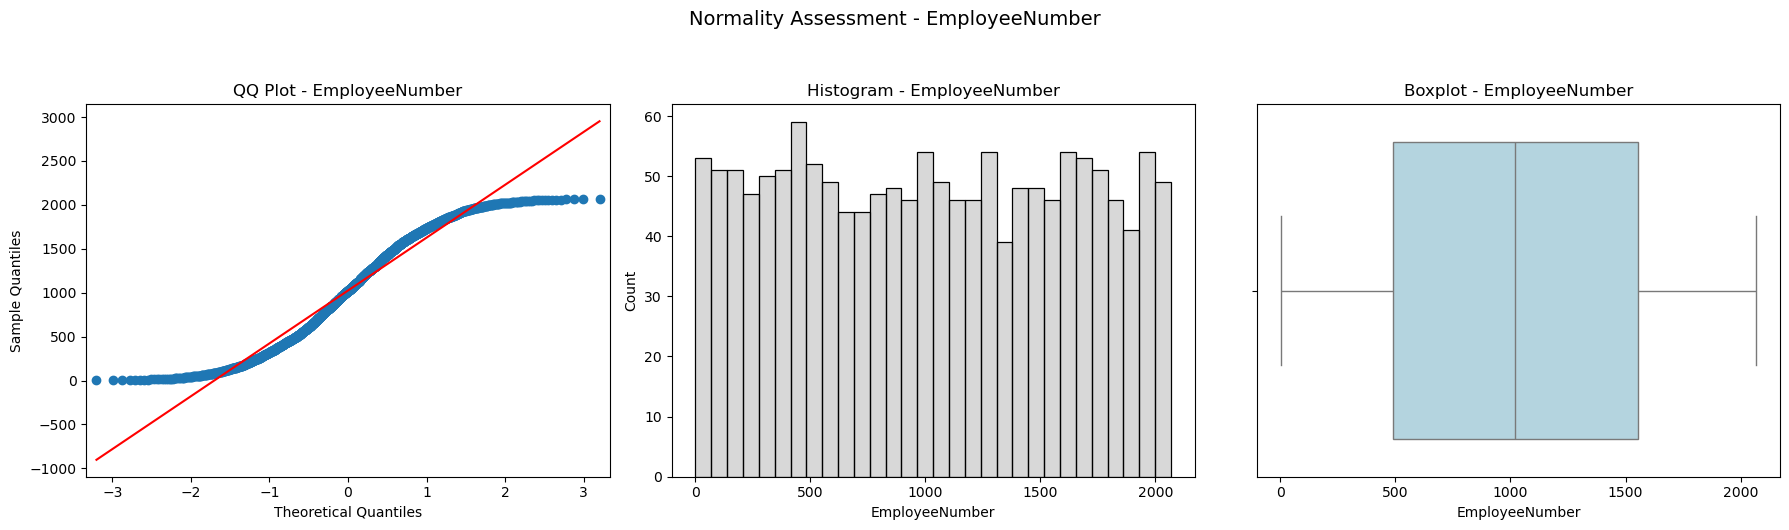


--- Variable: EnvironmentSatisfaction ---
  Anderson-Darling Statistic : 79.3391
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


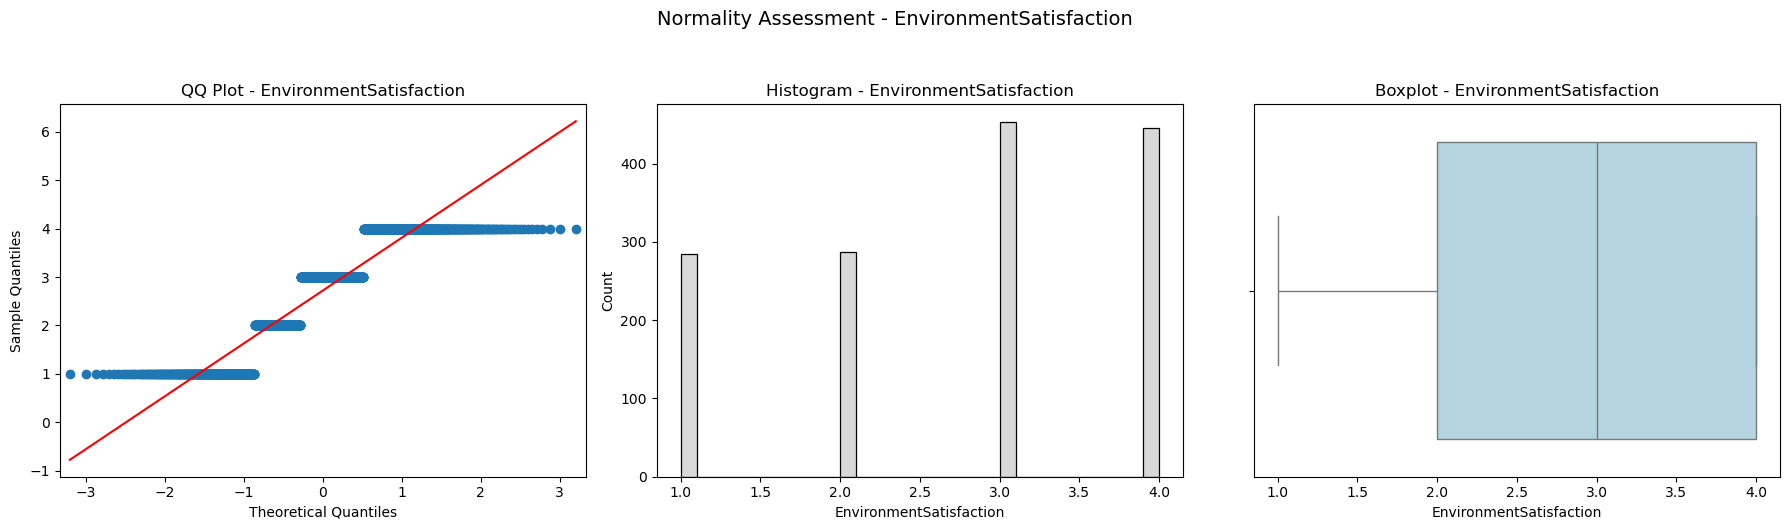


--- Variable: HourlyRate ---
  Anderson-Darling Statistic : 16.6465
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


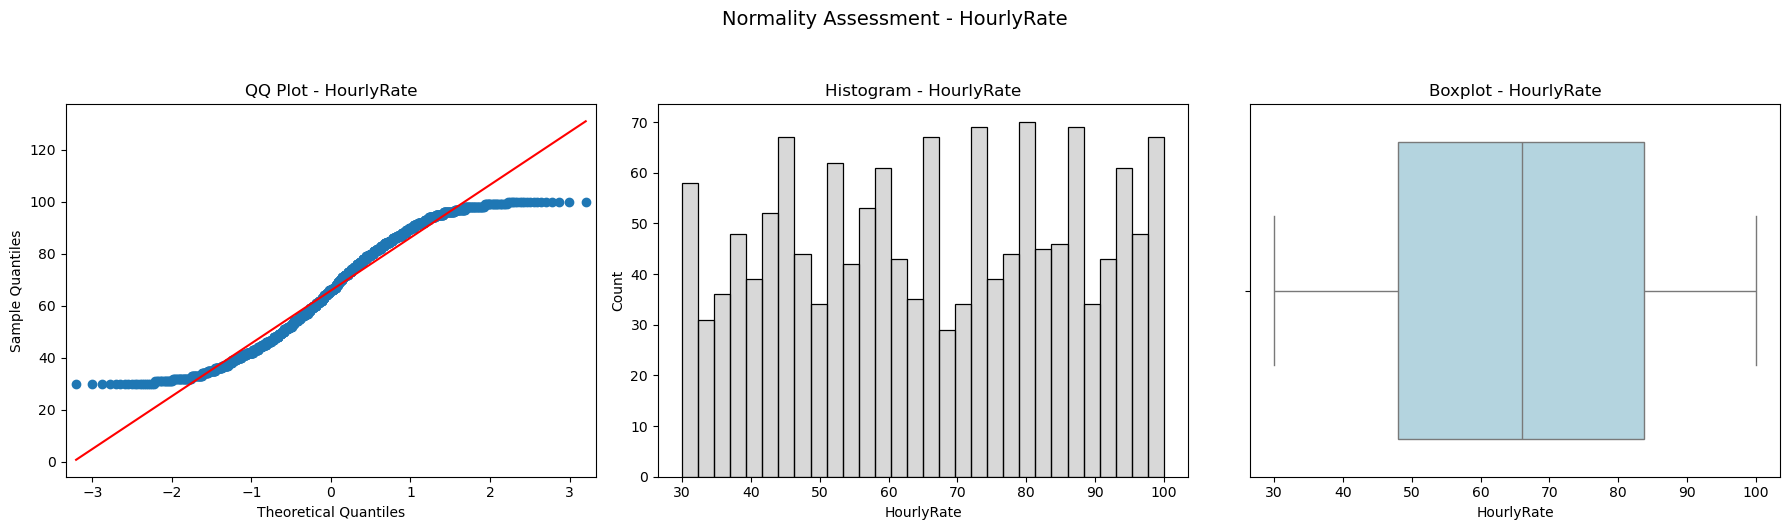


--- Variable: JobInvolvement ---
  Anderson-Darling Statistic : 141.4584
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


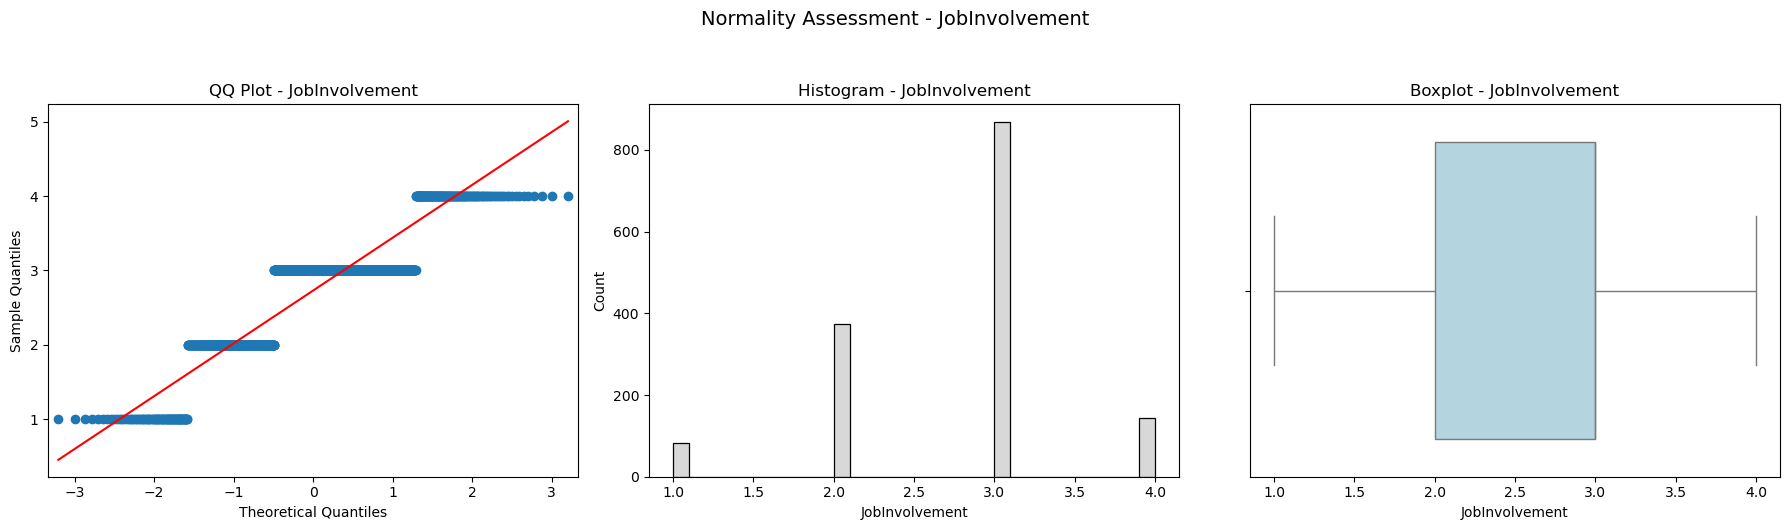


--- Variable: JobLevel ---
  Anderson-Darling Statistic : 94.0538
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


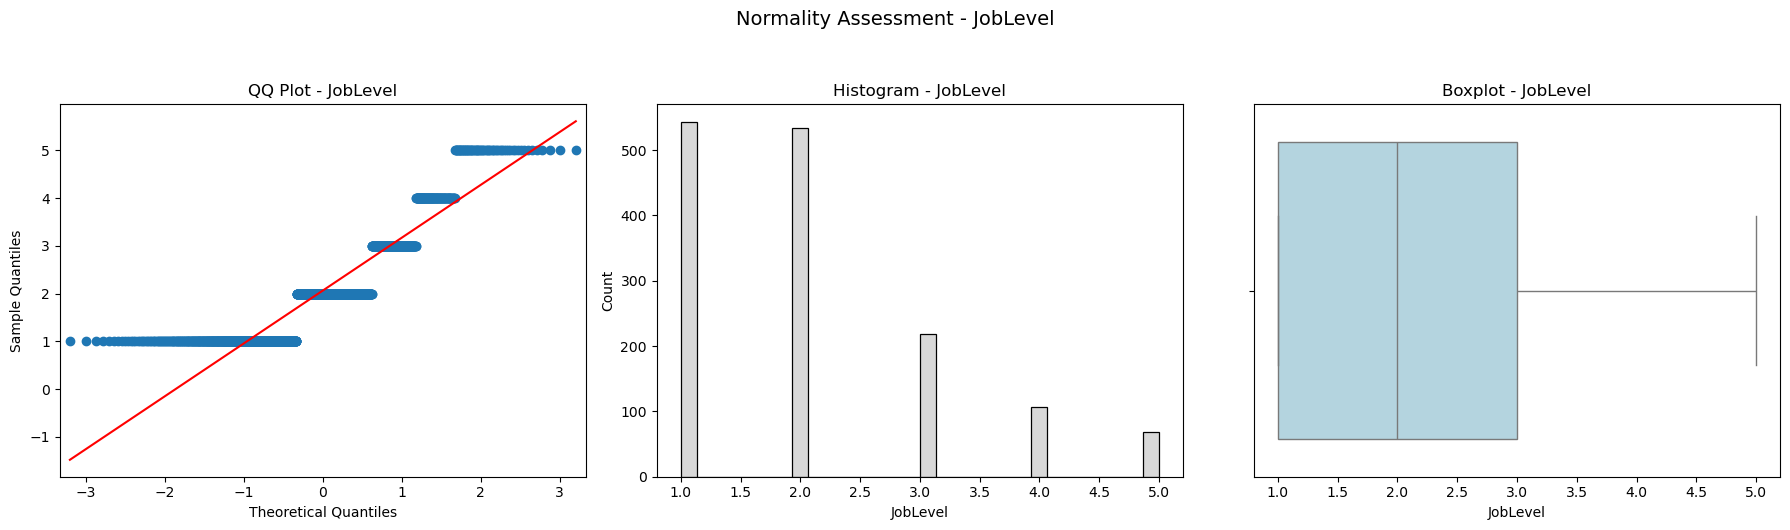


--- Variable: JobSatisfaction ---
  Anderson-Darling Statistic : 81.1776
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


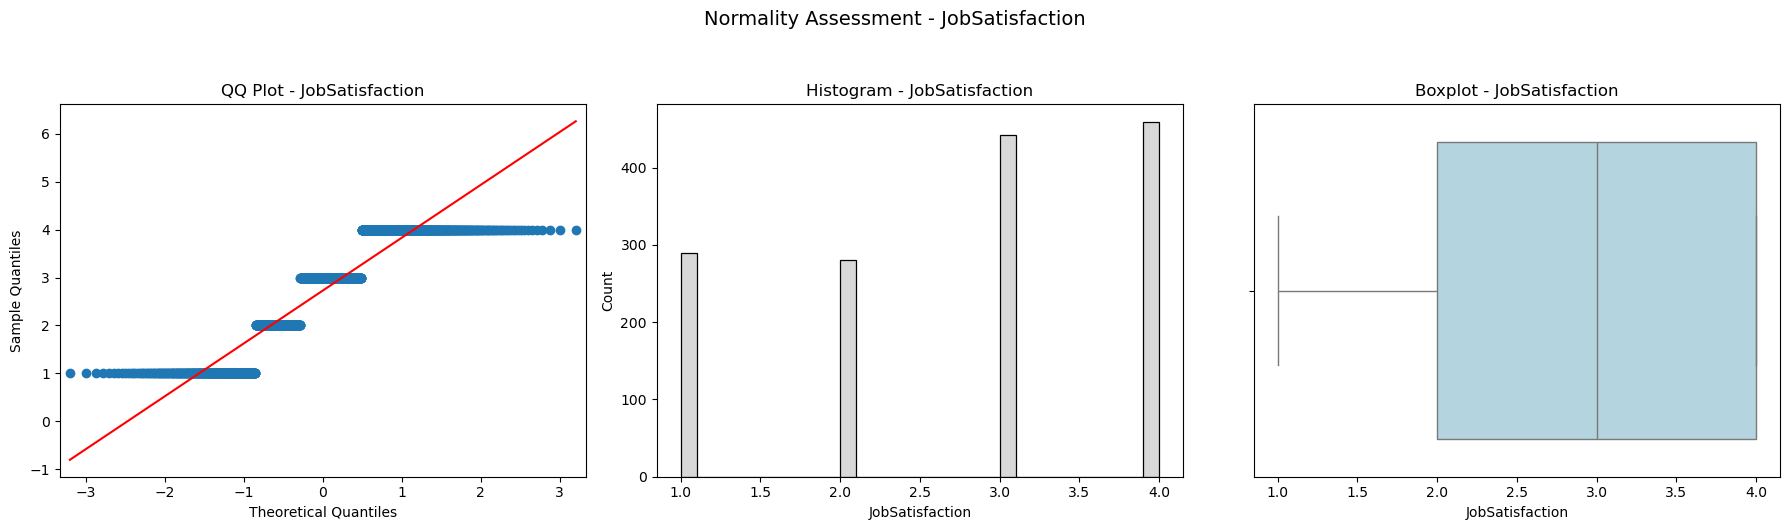


--- Variable: MonthlyIncome ---
  Anderson-Darling Statistic : 85.3906
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


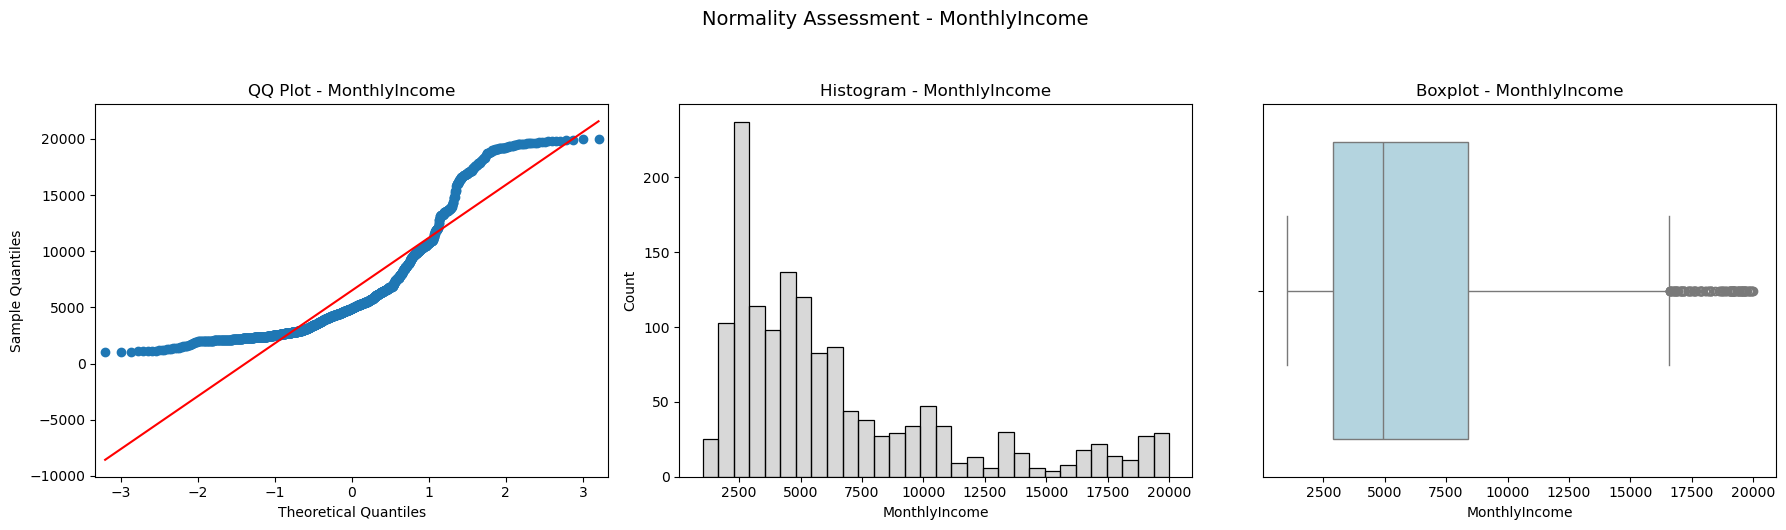


--- Variable: MonthlyRate ---
  Anderson-Darling Statistic : 17.4141
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


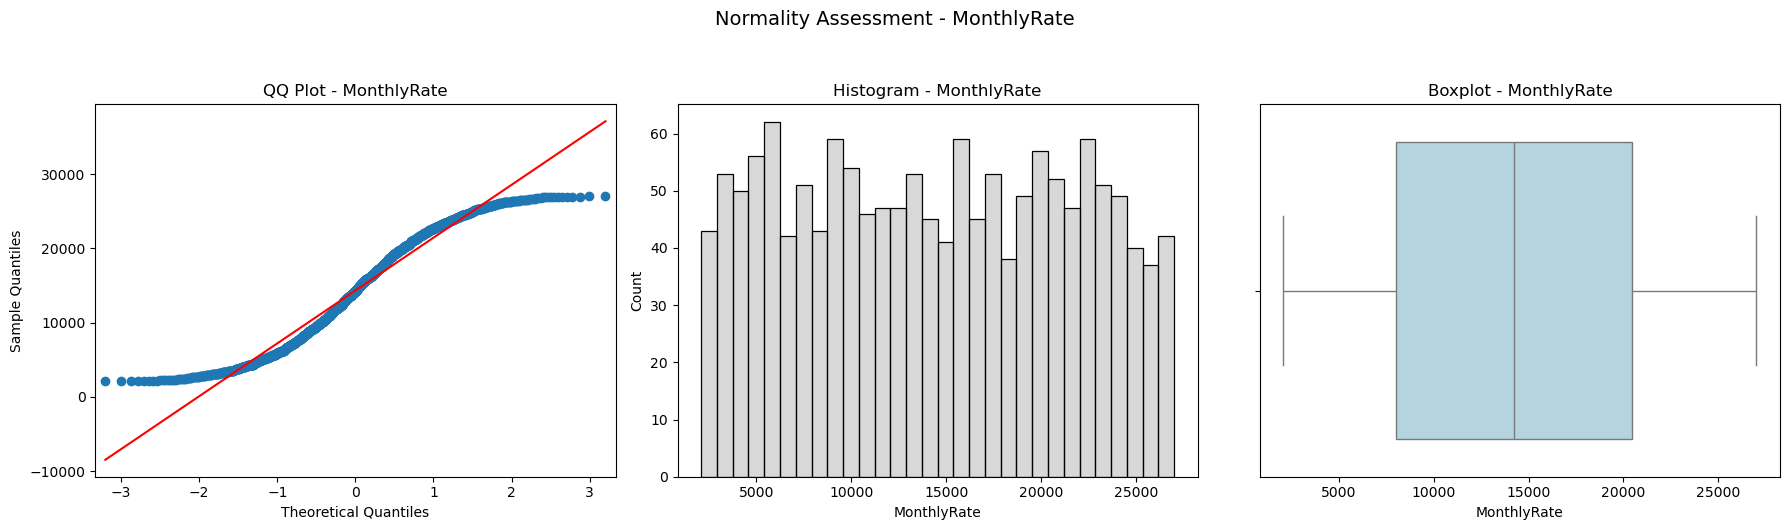


--- Variable: NumCompaniesWorked ---
  Anderson-Darling Statistic : 83.5388
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


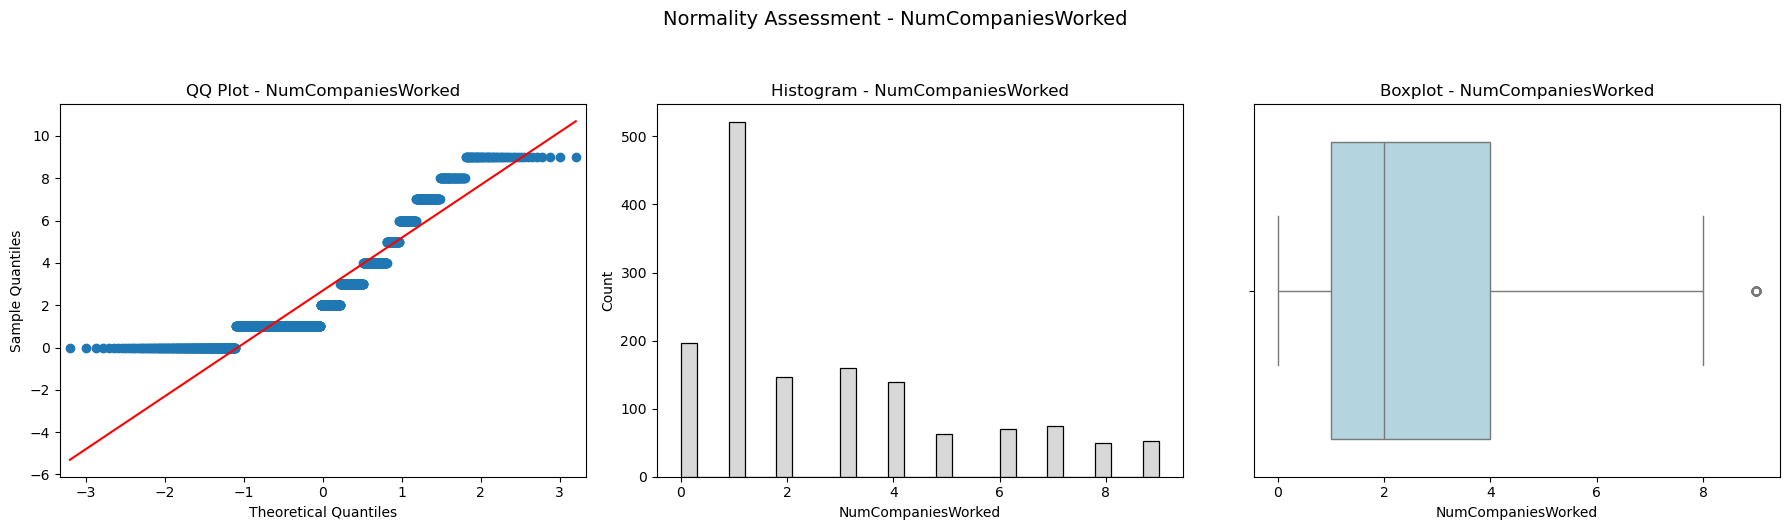


--- Variable: PercentSalaryHike ---
  Anderson-Darling Statistic : 47.7992
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


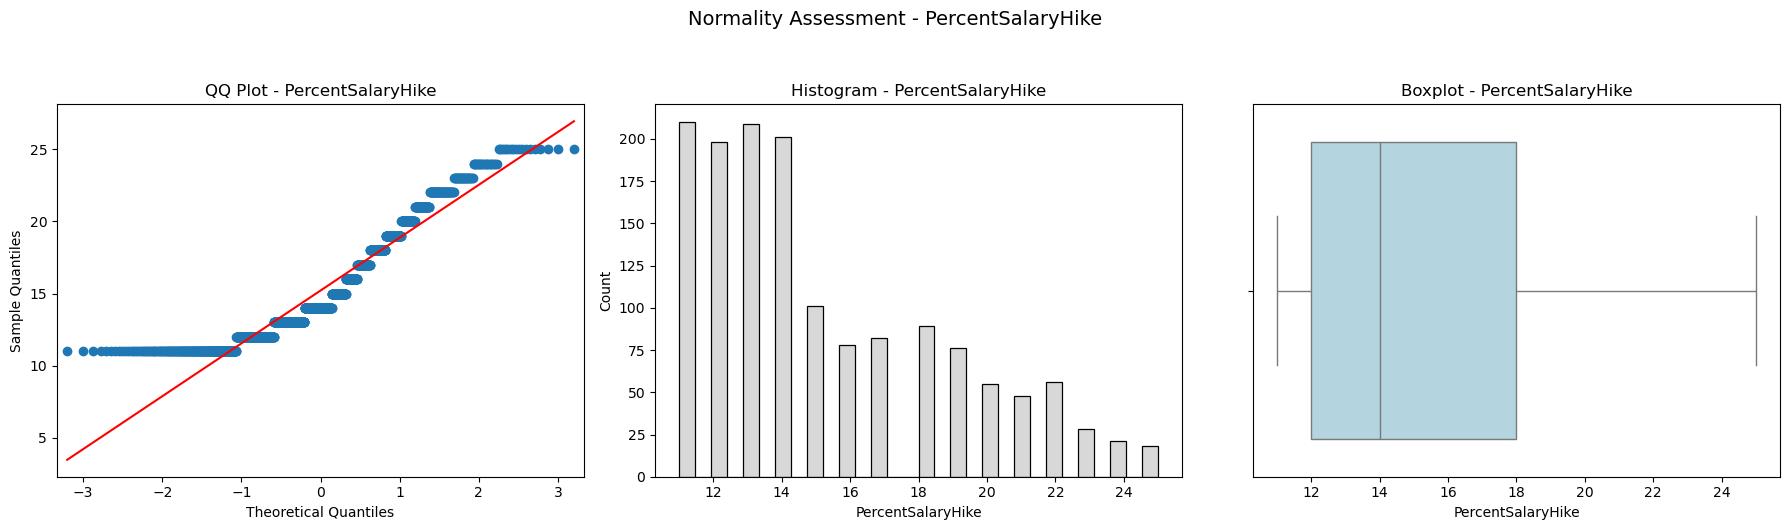


--- Variable: PerformanceRating ---
  Anderson-Darling Statistic : 432.5839
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


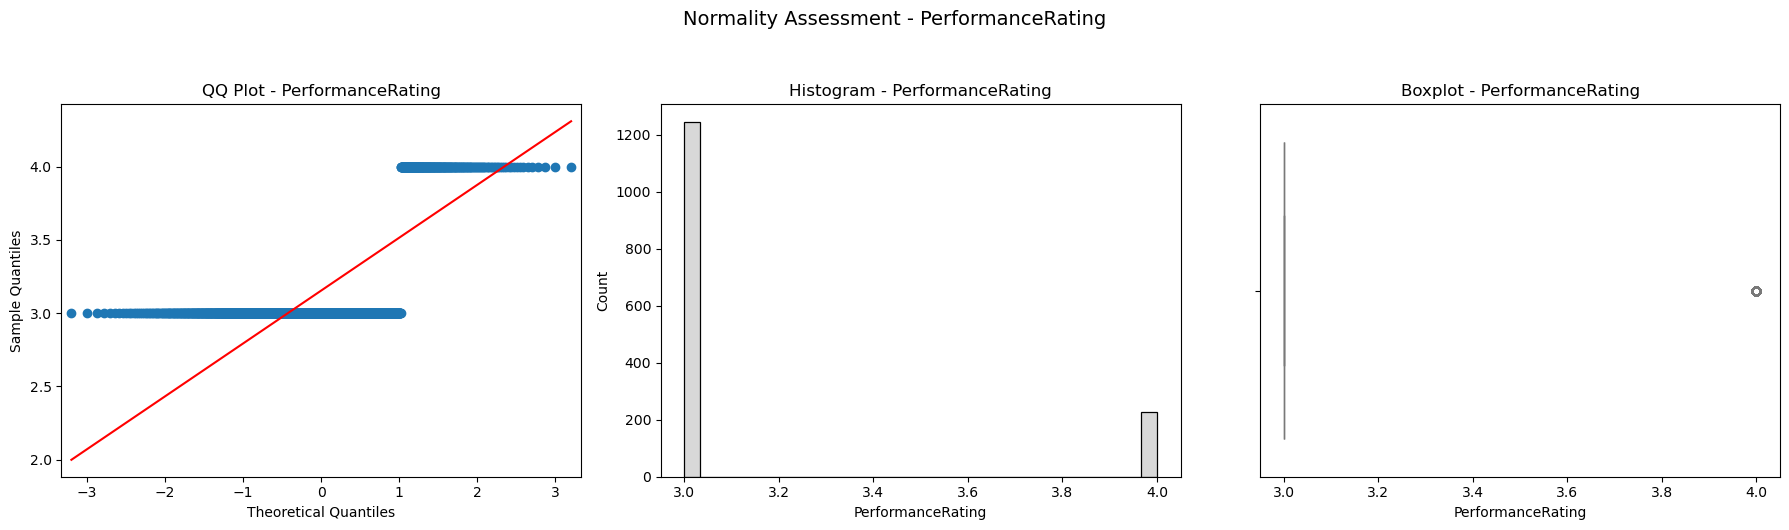


--- Variable: RelationshipSatisfaction ---
  Anderson-Darling Statistic : 76.8501
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


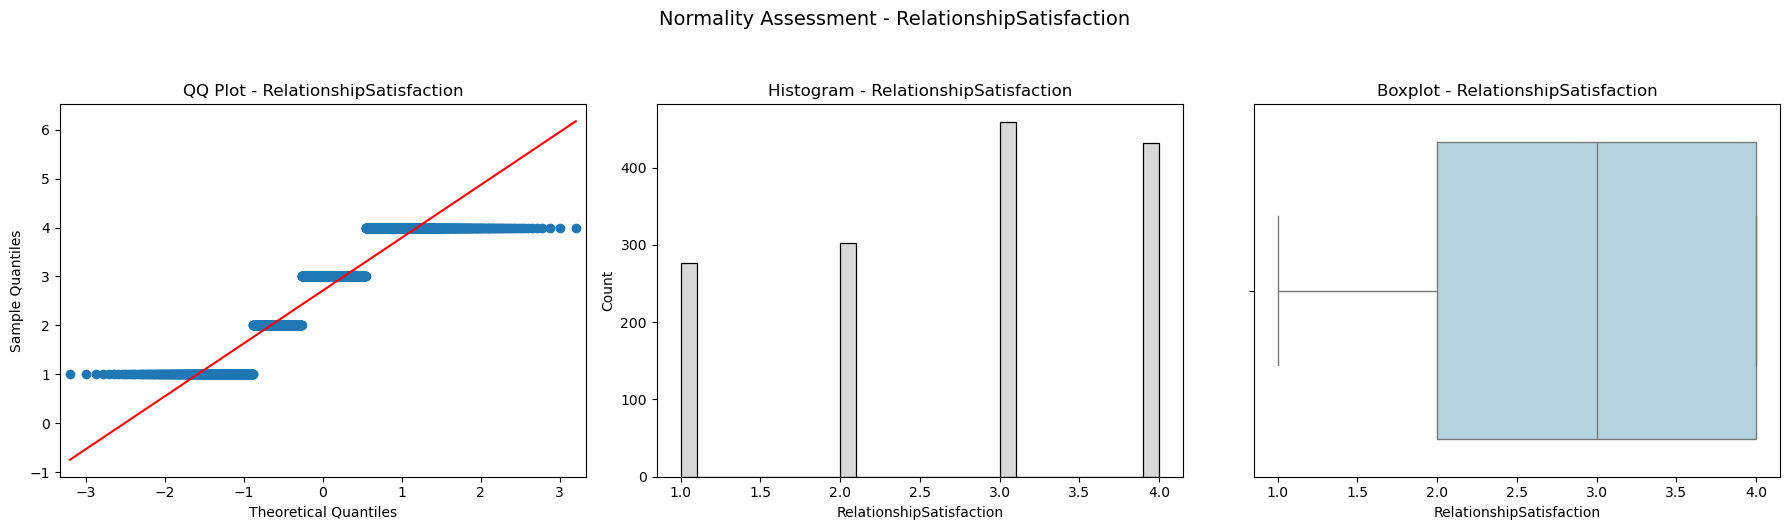


--- Variable: StandardHours ---
  Anderson-Darling Statistic : nan
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


C:\Users\Lovelyn Tampus\anaconda3\envs\training\Lib\site-packages\scipy\stats\_morestats.py:2215: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s


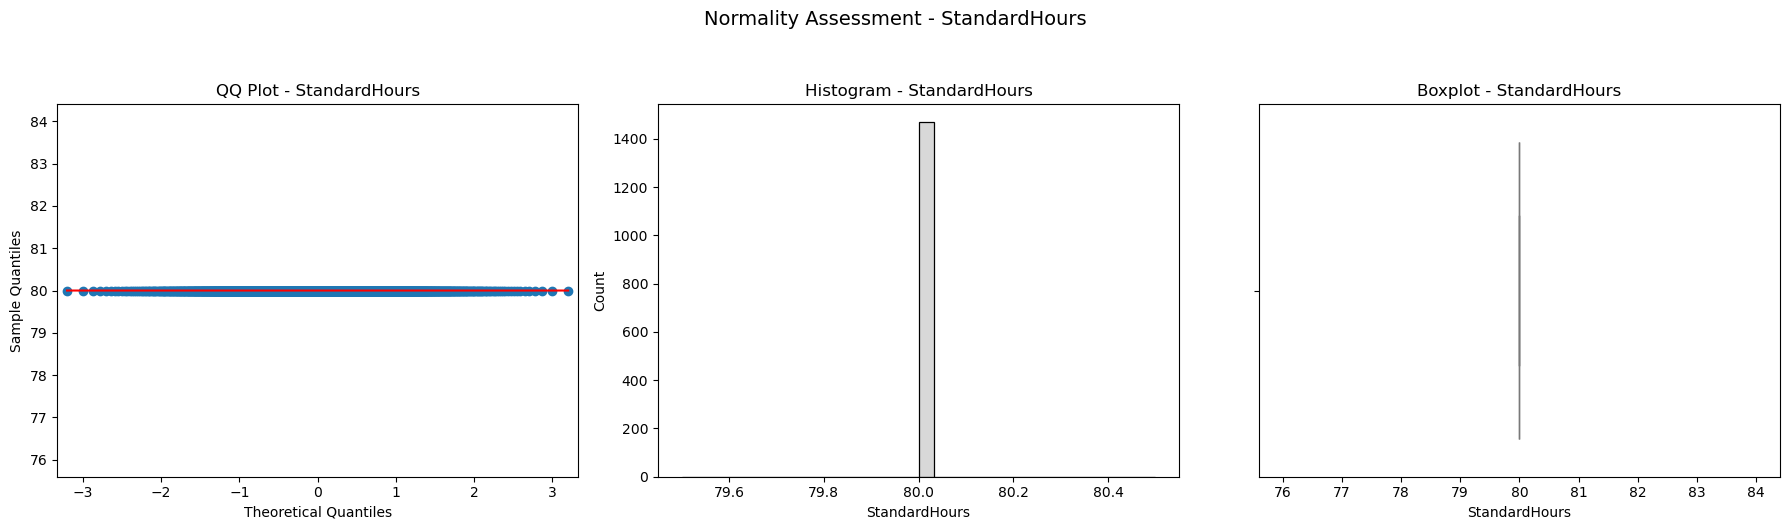


--- Variable: StockOptionLevel ---
  Anderson-Darling Statistic : 119.7306
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


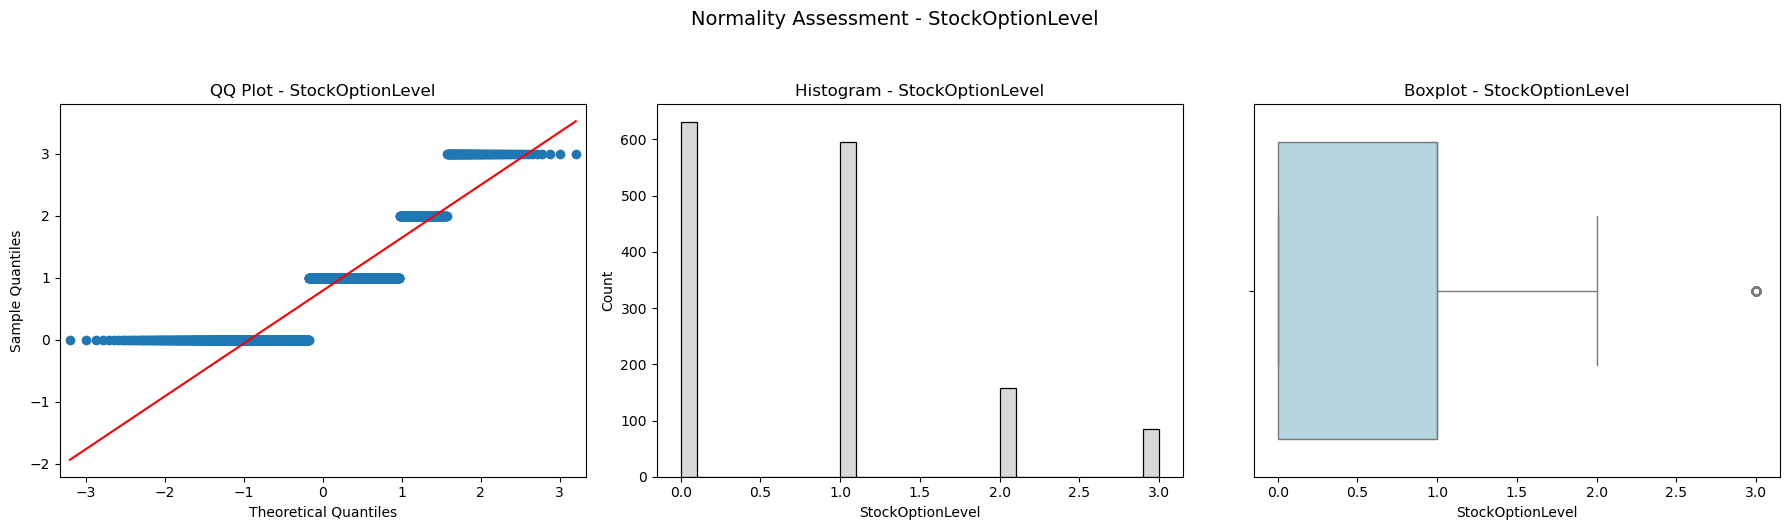


--- Variable: TotalWorkingYears ---
  Anderson-Darling Statistic : 43.5237
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


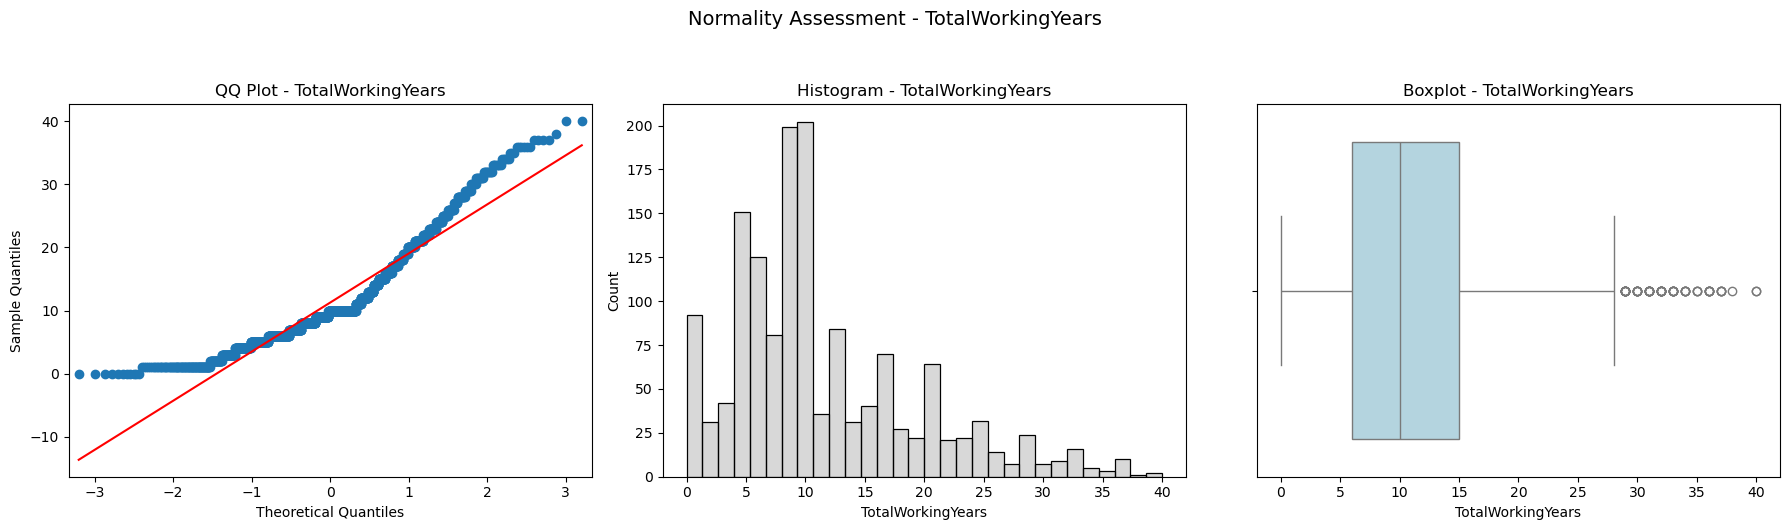


--- Variable: TrainingTimesLastYear ---
  Anderson-Darling Statistic : 69.2878
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


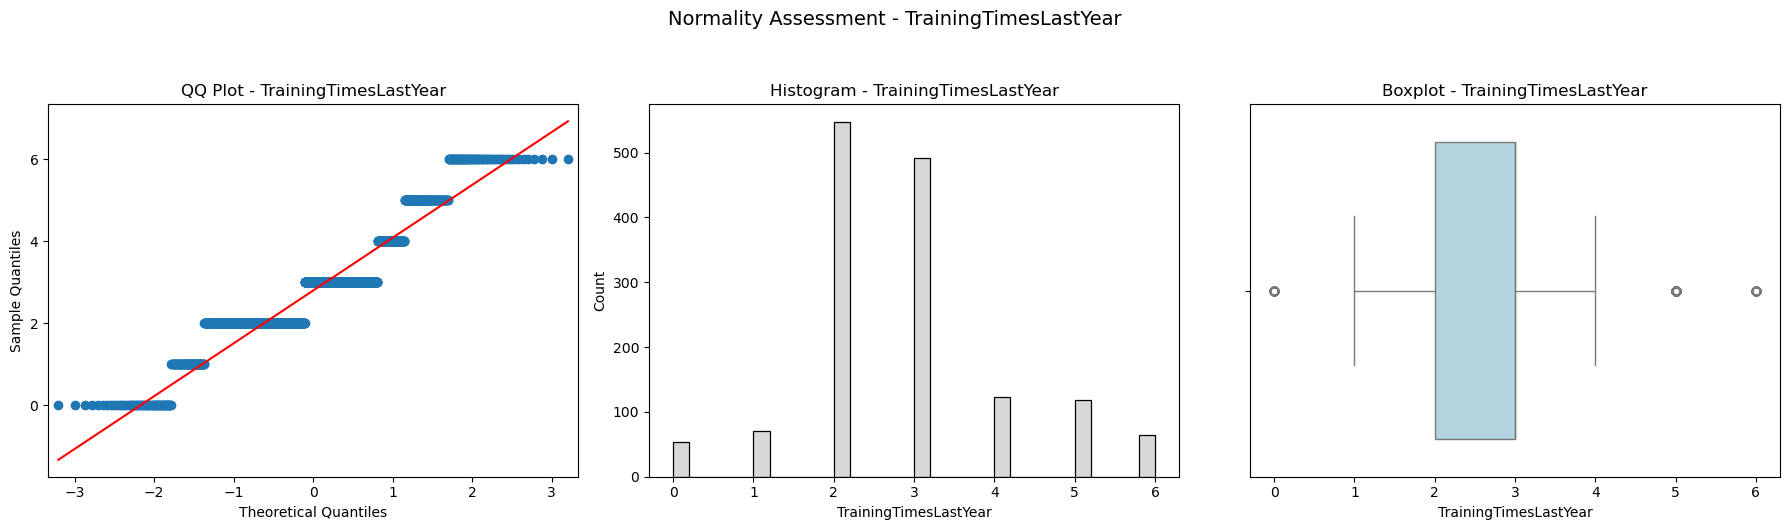


--- Variable: WorkLifeBalance ---
  Anderson-Darling Statistic : 147.4438
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


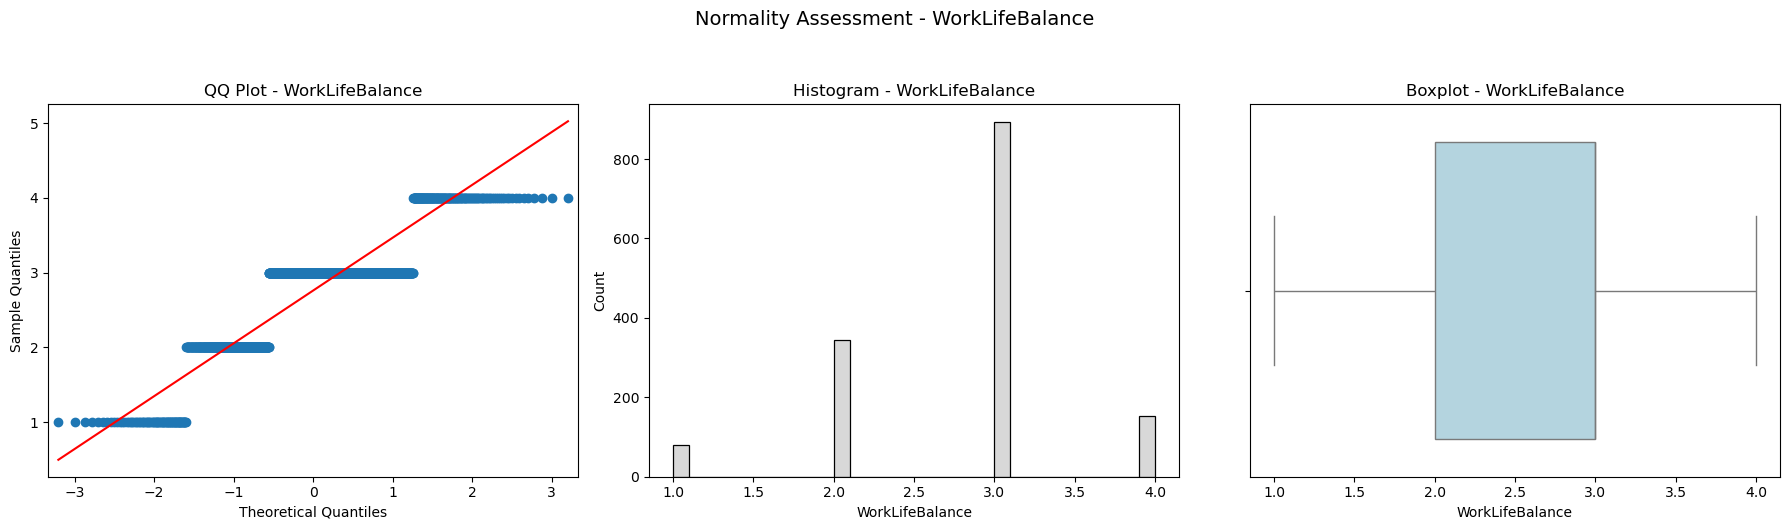


--- Variable: YearsAtCompany ---
  Anderson-Darling Statistic : 60.7112
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


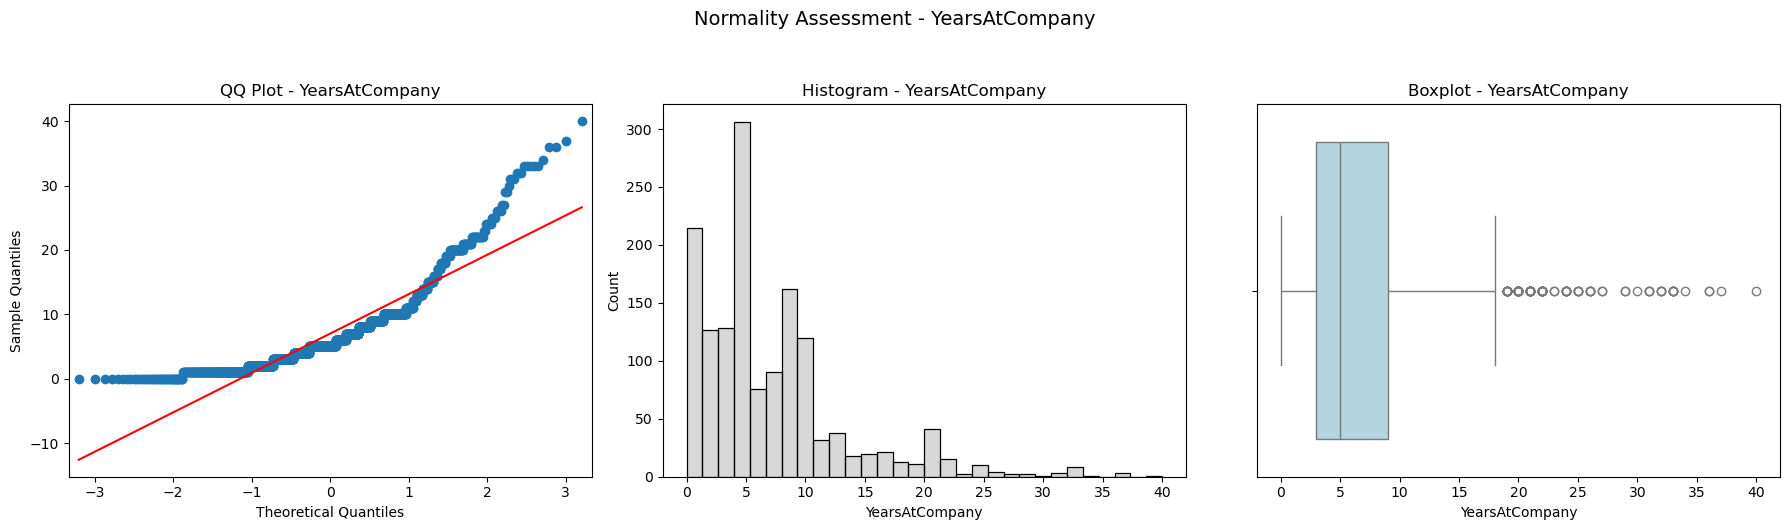


--- Variable: YearsInCurrentRole ---
  Anderson-Darling Statistic : 50.2632
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


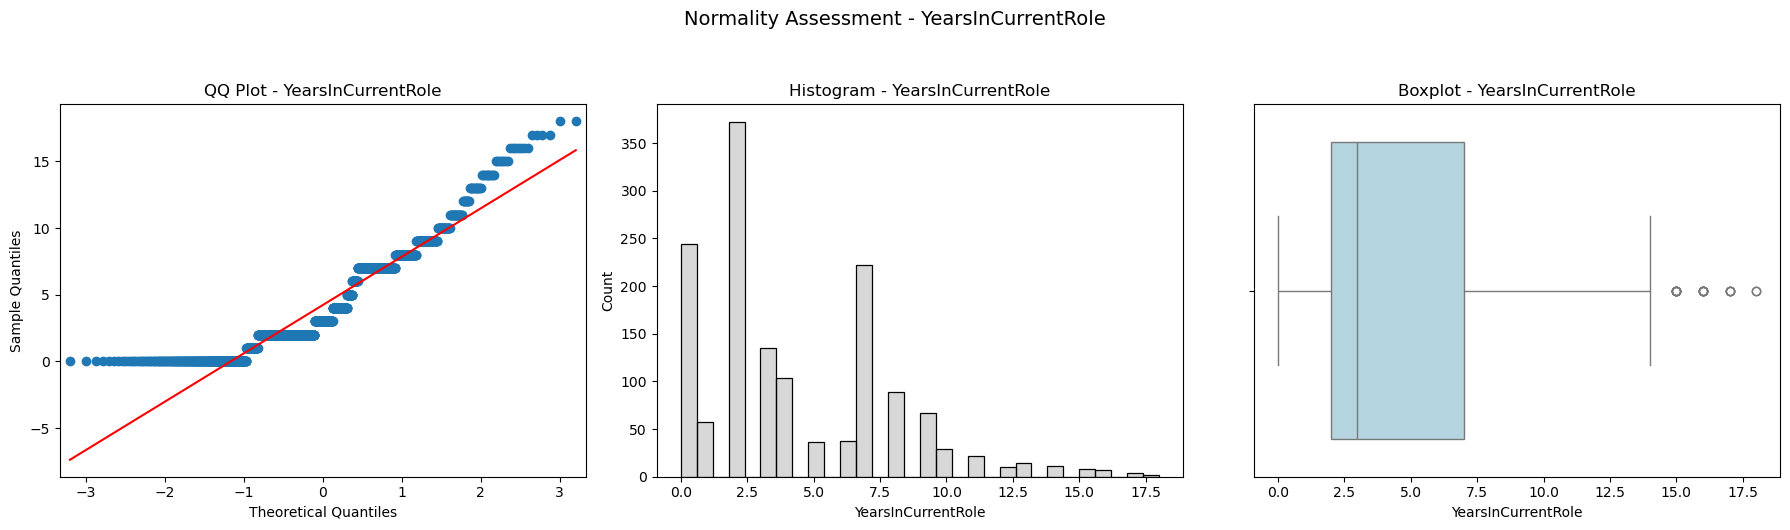


--- Variable: YearsSinceLastPromotion ---
  Anderson-Darling Statistic : 157.0653
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


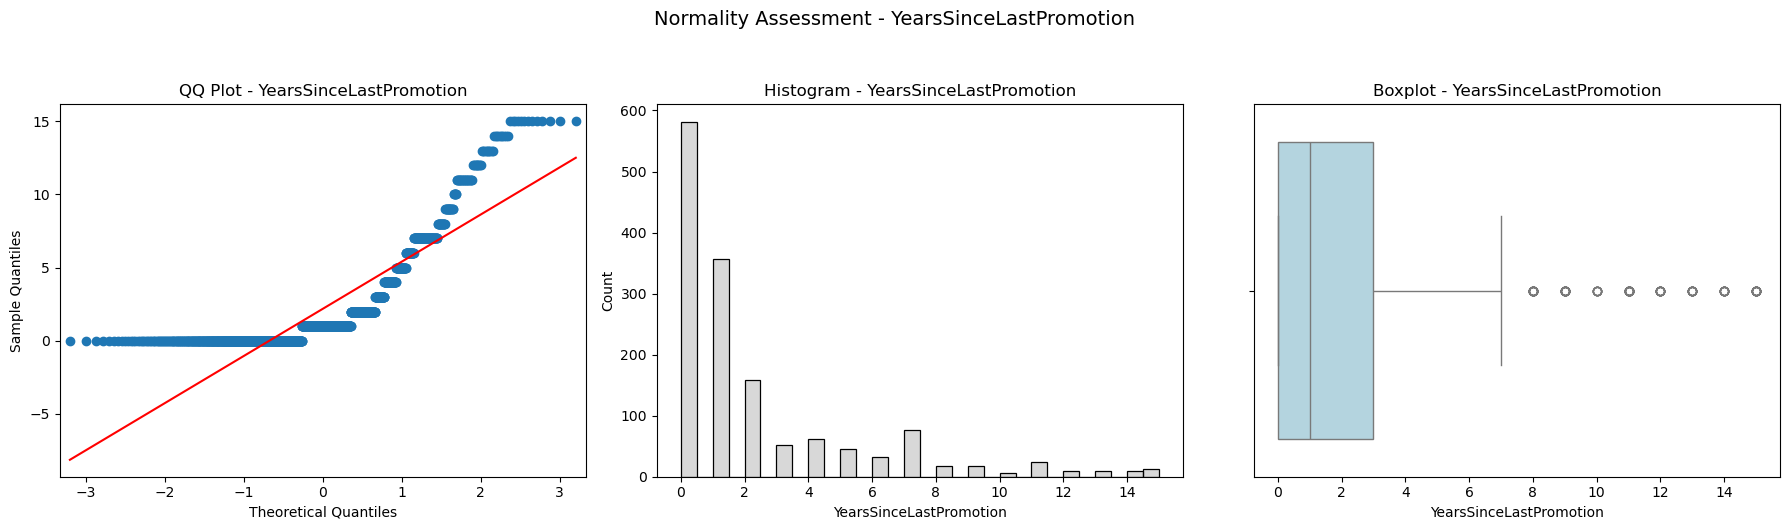


--- Variable: YearsWithCurrManager ---
  Anderson-Darling Statistic : 51.5875
  Critical Value (@ 5.0%) : 0.7850
  Decision : Reject Null


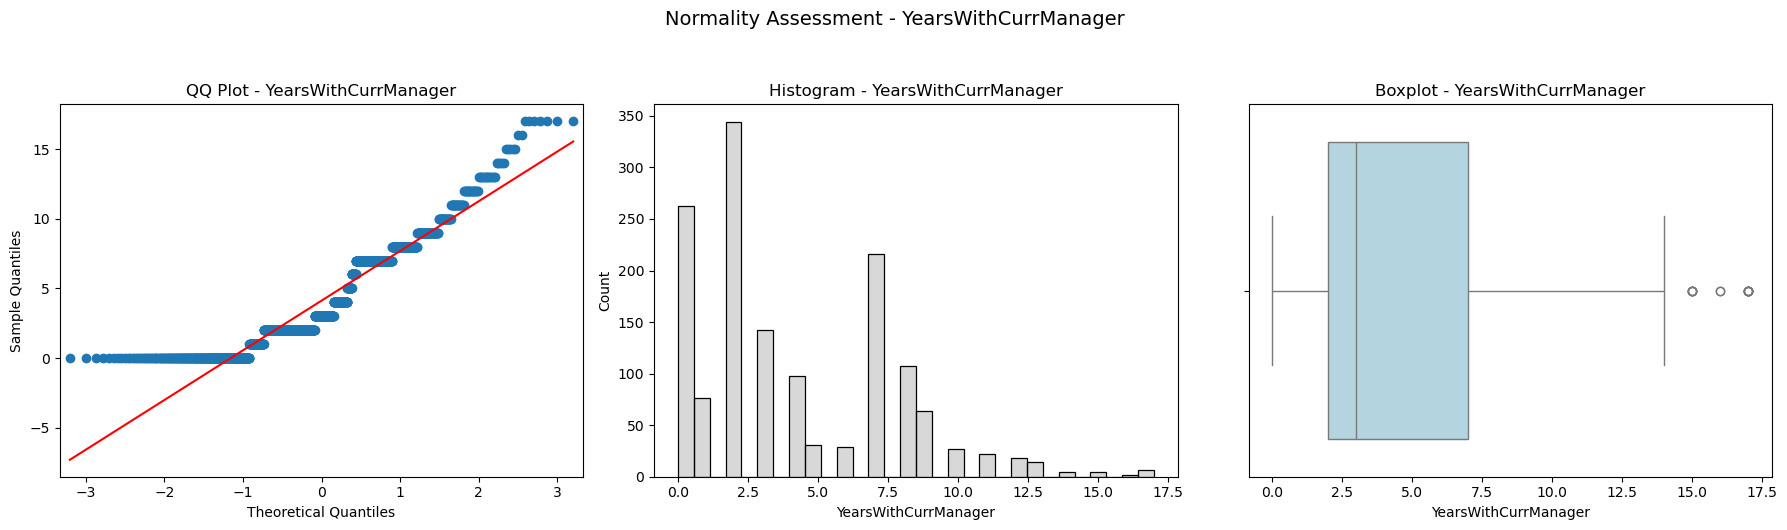

In [14]:
# Doing a normality check using histograms and AD-test
qd.normcheck_dashboard(df)

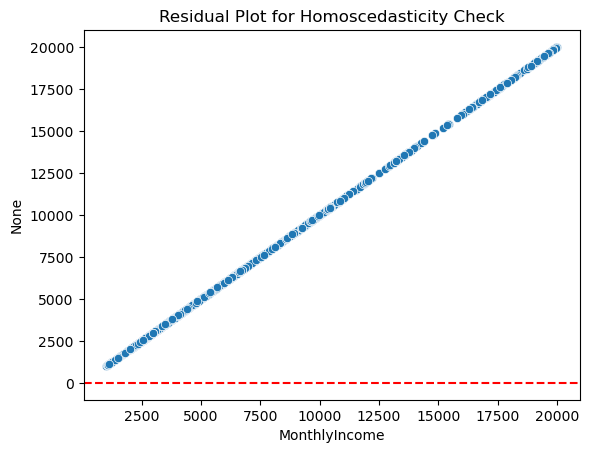

In [15]:
# Doing a homoscedasticity check with residual plots
residuals = df['MonthlyIncome'] - df['PerformanceRating']
sns.scatterplot(x=df['MonthlyIncome'], y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()

In [17]:
dfscaled.head(2)

,0,1
0,0.262454,0.0
1,0.217009,1.0


In [18]:
# Fixing column names
dfscaled.columns = ['MonthlyIncome', 'PerformanceRating']

In [19]:
dfscaled.head(2)

,MonthlyIncome,PerformanceRating
0,0.262454,0.0
1,0.217009,1.0


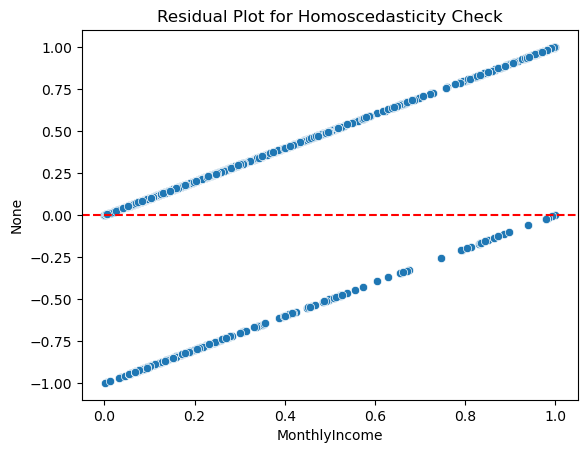

In [20]:
# Doing a homoscedasticity check with residual plots
residuals1 = dfscaled['MonthlyIncome'] - dfscaled['PerformanceRating']
sns.scatterplot(x=dfscaled['MonthlyIncome'], y=residuals1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()

In [21]:
# Option A: Kendall's tau-b
kendall_corr, kendall_p = stats.kendalltau(dfscaled['MonthlyIncome'], dfscaled['PerformanceRating'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: -0.0221, p-value: 0.3008


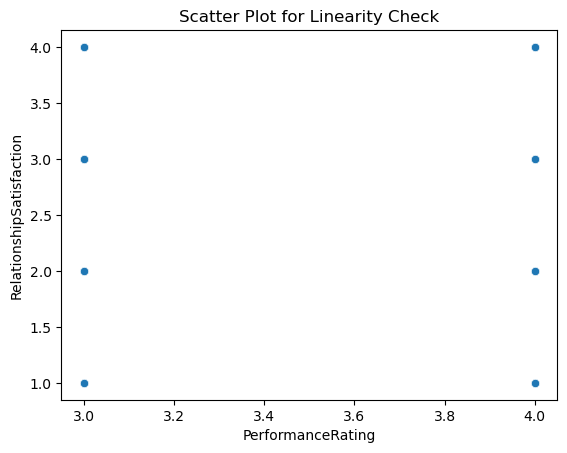

In [33]:
# Checking the linearity assumption of the variables using a scatter plot.
sns.scatterplot(x=df['PerformanceRating'], y=df['RelationshipSatisfaction'])
plt.title('Scatter Plot for Linearity Check')
plt.show()

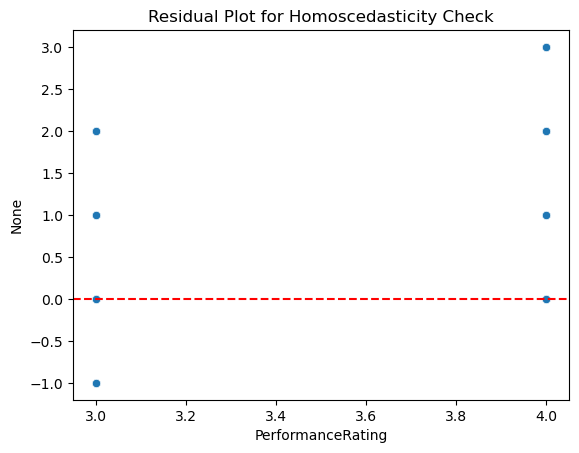

In [23]:
# Doing a homoscedasticity check with residual plots
residuals = df['PerformanceRating'] - df['RelationshipSatisfaction']
sns.scatterplot(x=df['PerformanceRating'], y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()

In [25]:
# Option A: Kendall's tau-b
kendall_corr, kendall_p = stats.kendalltau(df['PerformanceRating'], df['RelationshipSatisfaction'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: -0.0302, p-value: 0.2061


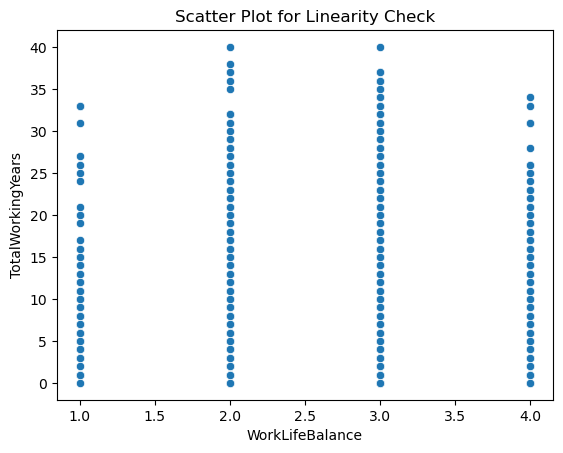

In [32]:
# Checking the linearity assumption of the variables using a scatter plot.
sns.scatterplot(x=df['WorkLifeBalance'], y=df['TotalWorkingYears'])
plt.title('Scatter Plot for Linearity Check')
plt.show()

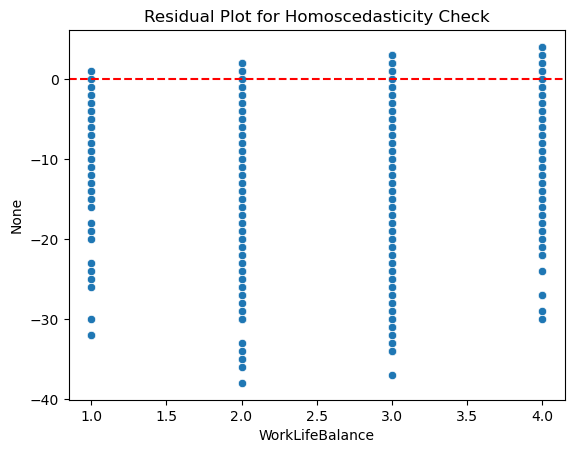

In [30]:
# Doing a homoscedasticity check with residual plots
residuals1 = df['WorkLifeBalance'] - df['TotalWorkingYears']
sns.scatterplot(x=df['WorkLifeBalance'], y=residuals1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()

In [31]:
# Option A: Kendall's tau-b
kendall_corr, kendall_p = stats.kendalltau(df['WorkLifeBalance'], df['TotalWorkingYears'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: 0.0023, p-value: 0.9120
